In [1]:
import os
import sys
import time
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import cupy as cp

In [2]:
# Change the working directory to the parent directory to allow importing the segadb package.
notebook_dir = os.getcwd()
parent_dir = os.path.abspath(os.path.join(notebook_dir, '..', '..'))
sys.path.append(parent_dir)

# from sega_learn.neural_networks import *

# print(f"Working directory: {notebook_dir}")
# print(f"Parent directory: {parent_dir}")

In [3]:
def time_function(func, num_repeats, *args, **kwargs):
    times = []
    for _ in range(num_repeats):
        start_time = time.time()
        result = func(*args, **kwargs)
        end_time = time.time()
        times.append(end_time - start_time)
    avg_time = np.mean(times)
    stddev_time = np.std(times)
    return avg_time, stddev_time, result

In [4]:
from test_nn import *
from test_nn_cupy import *
from test_nn_numba import *

## Run Time Comparison of Neural Network Implementations
### Comparison of CPU (numpy) and CPU (cupy) implementations

In [5]:
# Constants for testing
num_repeats = 10

# Neural Network Timing
nnt_layer_sizes_multiplier = 5
nnt_dataset_size = 100_000

# Optimizer Timing
optt_layer_sizes_multiplier = 25

# Loss Function Timing
losst_layer_sizes_multiplier = 10
losst_dataset_size = 1_000_000

# Train Epoch Timing
epocht_layer_sizes_multiplier = 2
epocht_dataset_sizes = [1_000, 5_000, 10_000, 50_000, 100_000, 250_000, 500_000]

In [6]:
# Compile Numba functions
init_compile()

Compiling Numba functions:   0%|          | 0/33 [00:00<?, ?it/s]

Numba functions compiled successfully.


#### Neural Network Timing

In [7]:
print("Base NN Timing Implementation:")
nn_base = time_nn_base(num_repeats, nnt_layer_sizes_multiplier, nnt_dataset_size)

print("\n\nCuPy NN Timing Implementation:")
nn_cupy = time_nn_cupy(num_repeats, nnt_layer_sizes_multiplier, nnt_dataset_size)

print("\n\nNumba NN Timing Implementation:")
nn_numba = time_nn_numba(num_repeats, nnt_layer_sizes_multiplier, nnt_dataset_size)

Base NN Timing Implementation:

Timing results for NeuralNetwork methods (averaged over 10 runs):
Performance for Layer sizes: [500, 250, 50], Dataset size: 100,000 samples
----------------------------------------------------------------------------------------------------
Function            : Average Time (s) ±  Std Dev (s)
forward             : 0.796000 seconds ± 0.030763 seconds
apply_dropout       : 0.629401 seconds ± 0.024025 seconds
backward            : 0.516100 seconds ± 0.033682 seconds
calculate_loss      : 0.607900 seconds ± 0.022107 seconds
evaluate            : 0.475800 seconds ± 0.029896 seconds
train (X,y Reduced) : 0.960900 seconds ± 0.026274 seconds


CuPy NN Timing Implementation:

Timing results for NeuralNetwork methods (averaged over 10 runs):
Performance for Layer sizes: [500, 250, 50], Dataset size: 100,000 samples
----------------------------------------------------------------------------------------------------
Function            : Average Time (s) ±  Std De

#### Optimizer Timing

In [8]:
print("Base NN Optimizer Implementation:")
nn_optimizer_times = time_nn_optimizer(num_repeats, optt_layer_sizes_multiplier)

print("\n\nCuPy NN Optimizer Implementation:")
nn_optimizer_times_cupy = time_nn_optimizer_cupy(num_repeats, optt_layer_sizes_multiplier)

print("\n\nNumba NN Optimizer Implementation:")
nn_optimizer_times_numba = time_nn_optimizer_numba(num_repeats, optt_layer_sizes_multiplier)

Base NN Optimizer Implementation:

Timing results for Optimizer methods (averaged over 10 runs):
Performance for Layer sizes: [2500, 1875, 1250, 625]
----------------------------------------------------------------------------------------------------
Optimizer Function       : Average Time (s) ±  Std Dev (s)
Adam_initialize          : 0.022998 seconds ± 0.002949 seconds
SGD_initialize           : 0.010801 seconds ± 0.000595 seconds
Adadelta_initialize      : 0.029597 seconds ± 0.003269 seconds
----------------------------------------------------------------------
Adam_update              : 0.298599 seconds ± 0.032496 seconds
SGD_update               : 0.108702 seconds ± 0.011712 seconds
Adadelta_update          : 0.360697 seconds ± 0.008238 seconds


CuPy NN Optimizer Implementation:

Timing results for Optimizer methods (averaged over 10 runs):
Performance for Layer sizes: [2500, 1875, 1250, 625]
-----------------------------------------------------------------------------------------

#### Loss Function Timing

In [9]:
print("Base NN Loss Implementation:")
nn_loss_base = time_nn_loss(num_repeats, losst_layer_sizes_multiplier, losst_dataset_size)

print("\n\nCuPy NN Loss Implementation:")
nn_loss_cupy = time_nn_loss_cupy(num_repeats, losst_layer_sizes_multiplier, losst_dataset_size)

print("\n\nNumba NN Loss Implementation:")
nn_loss_numba = time_nn_loss_numba(num_repeats, losst_layer_sizes_multiplier, losst_dataset_size)

Base NN Loss Implementation:

Timing results for Loss functions (averaged over 10 runs):
Performance for Layer sizes: [1000, 500, 100], Dataset size: 1,000,000 samples
----------------------------------------------------------------------------------------------------
Loss Function            : Average Time (s) ±  Std Dev (s)
CrossEntropyLoss         : 2.476200 seconds ± 0.060883 seconds
BCEWithLogitsLoss        : 0.039501 seconds ± 0.003169 seconds


CuPy NN Loss Implementation:

Timing results for Loss functions (averaged over 10 runs):
Performance for Layer sizes: [1000, 500, 100], Dataset size: 1,000,000 samples
----------------------------------------------------------------------------------------------------
Loss Function            : Average Time (s) ±  Std Dev (s)
CrossEntropyLoss         : 0.255934 seconds ± 0.051137 seconds
BCEWithLogitsLoss        : 0.003300 seconds ± 0.005916 seconds


Numba NN Loss Implementation:

Timing results for Loss functions (averaged over 10 runs)

#### Epoch Timings

In [10]:
print("Base NN Single Epoch Implementation:")
nn_epoch_base = time_nn_epoch(num_repeats, epocht_layer_sizes_multiplier, epocht_dataset_sizes, save_csv=False)

print("\n\nCuPy NN Single Epoch Implementation:")
nn_epoch_cupy = time_nn_epoch_cupy(num_repeats, epocht_layer_sizes_multiplier, epocht_dataset_sizes, save_csv=False)

print("\n\nNumba NN Single Epoch Implementation:")
nn_epoch_numba = time_nn_epoch_numba(num_repeats, epocht_layer_sizes_multiplier, epocht_dataset_sizes, save_csv=False)

Base NN Single Epoch Implementation:

Timing results for NeuralNetwork train method (averaged over 10 runs):
Performance for Layer sizes: [200, 100, 20]
----------------------------------------------------------------------------------------------------
Dataset Size        : Average Time (s) ±  Std Dev (s)
1,000               : 0.008800 seconds ± 0.001400 seconds
5,000               : 0.045300 seconds ± 0.002572 seconds
10,000              : 0.098399 seconds ± 0.007697 seconds
50,000              : 0.452700 seconds ± 0.010937 seconds
100,000             : 0.911899 seconds ± 0.039261 seconds
250,000             : 2.195500 seconds ± 0.035347 seconds
500,000             : 4.679799 seconds ± 0.190560 seconds


CuPy NN Single Epoch Implementation:

Timing results for NeuralNetwork train method (averaged over 10 runs):
Performance for Layer sizes: [200, 100, 20]
----------------------------------------------------------------------------------------------------
Dataset Size        : Average 

## Visualization of Neural Network Timing Results

### Setup

In [29]:
# Combine results from CPU, CuPy, and Numba
def combine_results(*results_dicts):
    combined_results = []
    for results_dict in results_dicts:
        for func_name, (avg_time, stddev_time) in results_dict.items():
            combined_results.append([func_name, avg_time, stddev_time])
    
    # Create DataFrame from collected results
    results = pd.DataFrame(combined_results, columns=["Function", "Average Time (s)", "Std Dev (s)"])
    
    return results

In [30]:
cpu_results = combine_results(nn_base, nn_optimizer_times, nn_loss_base)
cupy_results = combine_results(nn_cupy, nn_optimizer_times_cupy, nn_loss_cupy)
numba_results = combine_results(nn_numba, nn_optimizer_times_numba, nn_loss_numba)

In [31]:
# Add a column to distinguish CPU and CuPy results
cpu_results["Implementation"] = "CPU"
cupy_results["Implementation"] = "CuPy"
numba_results["Implementation"] = "Numba"

# Combine the datasets
results = pd.concat([cpu_results, cupy_results, numba_results])
results

,Function,Average Time (s),Std Dev (s),Implementation
0,forward,0.796000,0.030763,CPU
1,apply_dropout,0.629401,0.024025,CPU
2,backward,0.516100,0.033682,CPU
3,calculate_loss,0.607900,0.022107,CPU
4,evaluate,0.475800,0.029896,CPU
5,train,0.960900,0.026274,CPU
6,Adam_initialize,0.022998,0.002949,CPU
7,Adam_update,0.298599,0.032496,CPU
8,SGD_initialize,0.010801,0.000595,CPU
9,SGD_update,0.108702,0.011712,CPU


In [32]:
# Create a pivot table for easier comparison
pivot_results = results.pivot(index='Function', columns='Implementation', values='Average Time (s)').reset_index()
pivot_results['Speedup (%) CuPy'] = ((pivot_results['CPU'] - pivot_results['CuPy']) / pivot_results['CPU'] * 100)
pivot_results['Speedup (%) Numba'] = ((pivot_results['CPU'] - pivot_results['Numba']) / pivot_results['CPU'] * 100)

# Sort functions by CPU execution time for better readability
pivot_results = pivot_results.sort_values('CPU', ascending=False)
pivot_results

Implementation,Function,CPU,CuPy,Numba,Speedup (%) CuPy,Speedup (%) Numba
5,CrossEntropyLoss,2.476200,0.255934,0.243600,89.664234,90.162360
13,train,0.960900,0.904498,0.382002,5.869692,60.245374
12,forward,0.796000,0.183601,0.629500,76.934559,20.917056
8,apply_dropout,0.629401,0.014101,0.244101,97.759609,61.217003
10,calculate_loss,0.607900,0.154898,0.439700,74.519175,27.669043
9,backward,0.516100,0.196602,0.571700,61.906193,-10.773005
11,evaluate,0.475800,0.151201,0.435900,68.221651,8.385845
1,Adadelta_update,0.360697,0.025499,0.100599,92.930639,72.109765
3,Adam_update,0.298599,0.032799,0.114197,89.015823,61.755730
7,SGD_update,0.108702,0.004401,0.048997,95.951715,54.925494


In [33]:
_nn_epoch_base = pd.DataFrame(nn_epoch_base, columns=['Dataset Size', 'Average Time (s)', 'Std Dev (s)'])
_nn_epoch_base["Implementation"] = "CPU"

_nn_epoch_cupy = pd.DataFrame(nn_epoch_cupy, columns=['Dataset Size', 'Average Time (s)', 'Std Dev (s)'])
_nn_epoch_cupy["Implementation"] = "CuPy"

_nn_epoch_numba = pd.DataFrame(nn_epoch_numba, columns=['Dataset Size', 'Average Time (s)', 'Std Dev (s)'])
_nn_epoch_numba["Implementation"] = "Numba"

# Combine the datasets
epoch_results = pd.concat([_nn_epoch_base, _nn_epoch_cupy, _nn_epoch_numba])
epoch_results

,Dataset Size,Average Time (s),Std Dev (s),Implementation
0,1000,0.008800,0.001400,CPU
1,5000,0.045300,0.002572,CPU
2,10000,0.098399,0.007697,CPU
3,50000,0.452700,0.010937,CPU
4,100000,0.911899,0.039261,CPU
5,250000,2.195500,0.035347,CPU
6,500000,4.679799,0.190560,CPU
0,1000,0.033700,0.014184,CuPy
1,5000,0.064901,0.007892,CuPy
2,10000,0.120900,0.005938,CuPy


In [35]:
# Set Seaborn style with improved readability
sns.set_theme(style="whitegrid", font_scale=1.2)
plt.rcParams['axes.labelpad'] = 10
plt.rcParams['axes.titlepad'] = 15
plt.rcParams['font.family'] = 'sans-serif'

### Visualizations

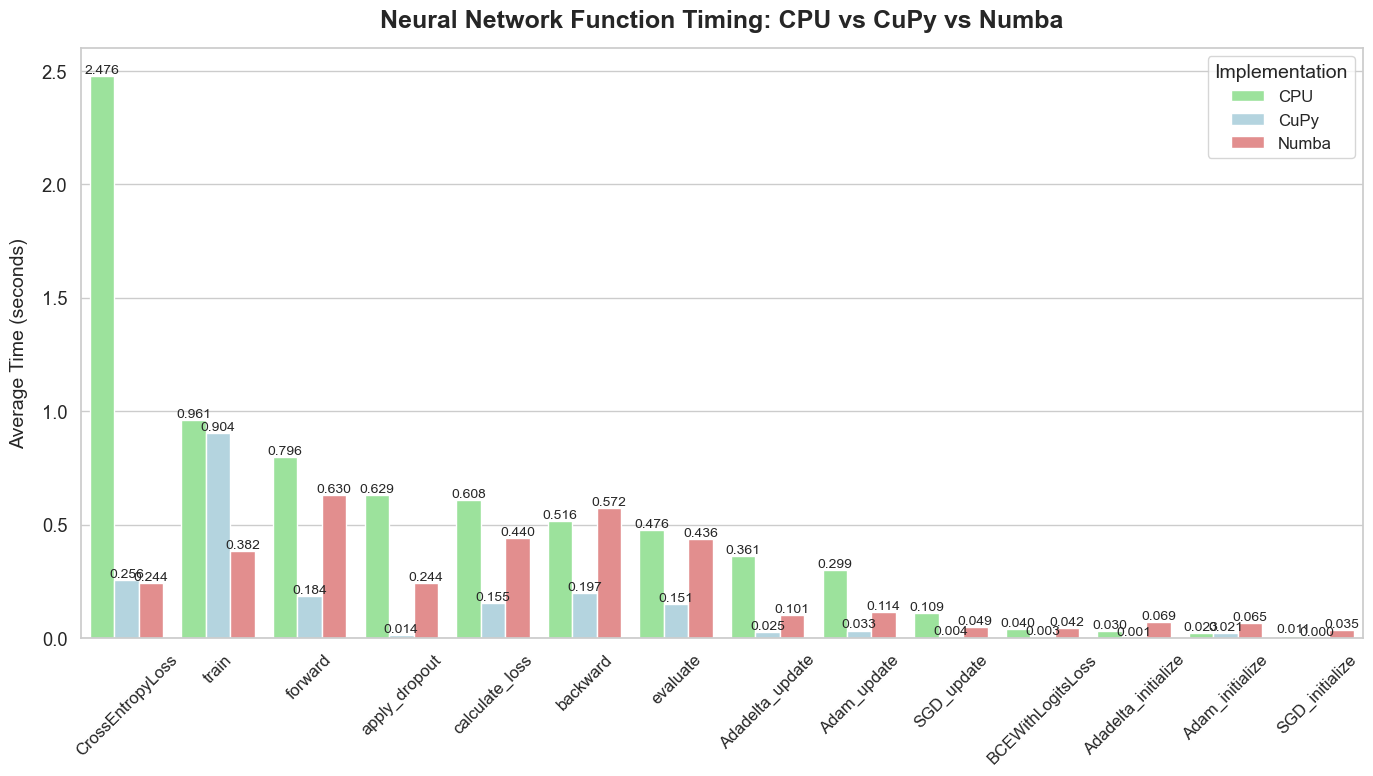

In [37]:
# First plot: Timing comparison
plt.figure(figsize=(14, 8))
melted_data = pd.melt(pivot_results, id_vars=['Function'], value_vars=['CPU', 'CuPy', 'Numba'])
melted_data.rename(columns={'variable': 'Implementation'}, inplace=True)

sns.barplot(x='Function', y='value', hue='Implementation', 
            data=melted_data,
            palette=['lightgreen', 'lightblue', 'lightcoral'])

plt.title('Neural Network Function Timing: CPU vs CuPy vs Numba', fontsize=18, fontweight='bold')
plt.ylabel('Average Time (seconds)', fontsize=14)
plt.xlabel('')
plt.xticks(rotation=45, fontsize=12)
plt.legend(title='Implementation', fontsize=12, title_fontsize=14)

# Add value labels on bars
for container in plt.gca().containers:
    plt.bar_label(container, fmt='%.3f', fontsize=10)

plt.tight_layout()
plt.show()

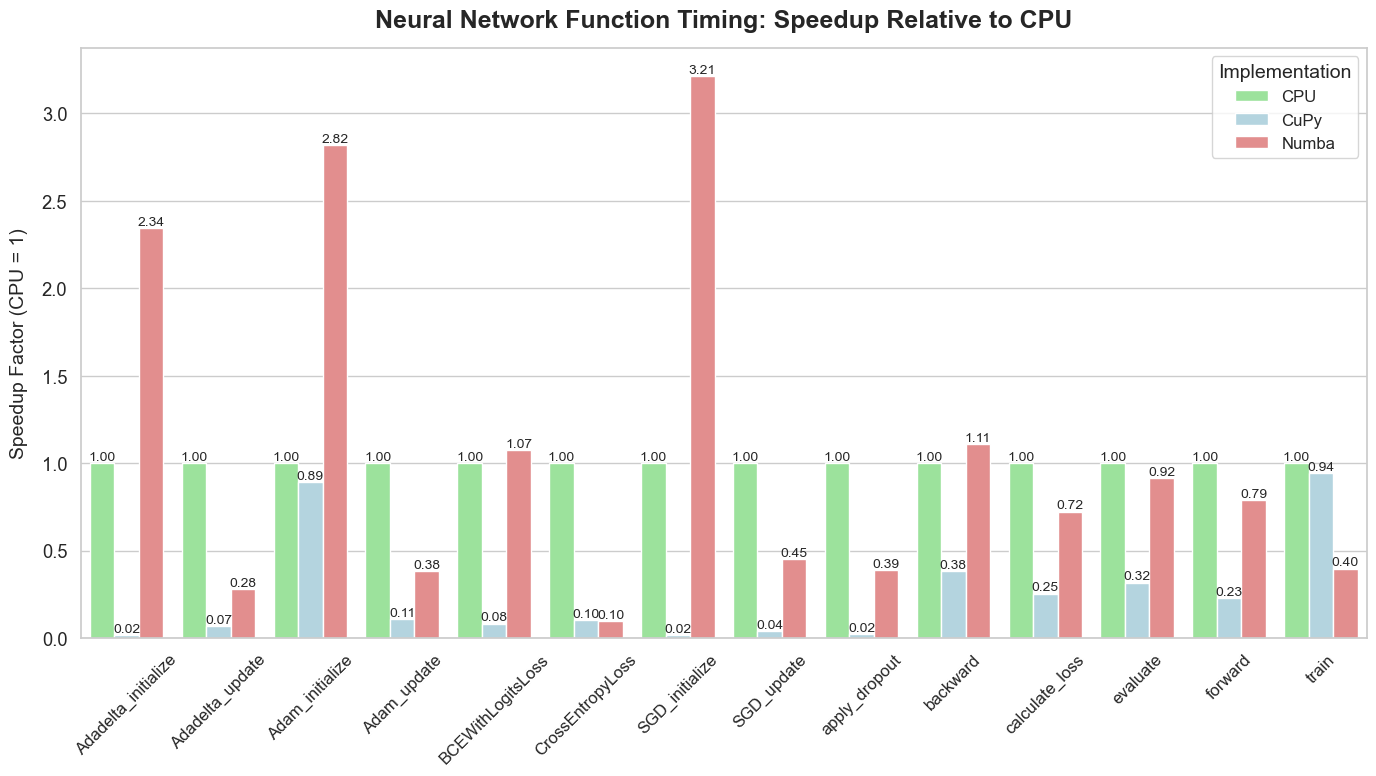

In [40]:
# Pivot the data so each function's timing for each implementation is in a separate column
df_pivot = melted_data.pivot(index='Function', columns='Implementation', values='value')

# Compute the speedup relative to CPU for each function.
# For CPU, speedup will always be 1 (since CPU_time/CPU_time == 1)
df_speedup = df_pivot.div(df_pivot['CPU'], axis=0)

# Melt back to long form for plotting
speedup_data = df_speedup.reset_index().melt(id_vars='Function', value_name='speedup')

# Create the plot
plt.figure(figsize=(14, 8))
sns.barplot(x='Function', y='speedup', hue='Implementation', 
            data=speedup_data,
            palette=['lightgreen', 'lightblue', 'lightcoral'])

plt.title('Neural Network Function Timing: Speedup Relative to CPU', fontsize=18, fontweight='bold')
plt.ylabel('Speedup Factor (CPU = 1)', fontsize=14)
plt.xlabel('')
plt.xticks(rotation=45, fontsize=12)
plt.legend(title='Implementation', fontsize=12, title_fontsize=14)

# Add value labels on bars
for container in plt.gca().containers:
    plt.bar_label(container, fmt='%.2f', fontsize=10)

plt.tight_layout()
plt.show()


In [42]:
print(epoch_results)

   Dataset Size  Average Time (s)  Std Dev (s) Implementation
0          1000          0.008800     0.001400            CPU
1          5000          0.045300     0.002572            CPU
2         10000          0.098399     0.007697            CPU
3         50000          0.452700     0.010937            CPU
4        100000          0.911899     0.039261            CPU
5        250000          2.195500     0.035347            CPU
6        500000          4.679799     0.190560            CPU
0          1000          0.033700     0.014184           CuPy
1          5000          0.064901     0.007892           CuPy
2         10000          0.120900     0.005938           CuPy
3         50000          0.546601     0.009774           CuPy
4        100000          1.142801     0.042581           CuPy
5        250000          2.972100     0.349775           CuPy
6        500000          6.098267     0.721430           CuPy
0          1000          0.005998     0.000629          Numba
1       

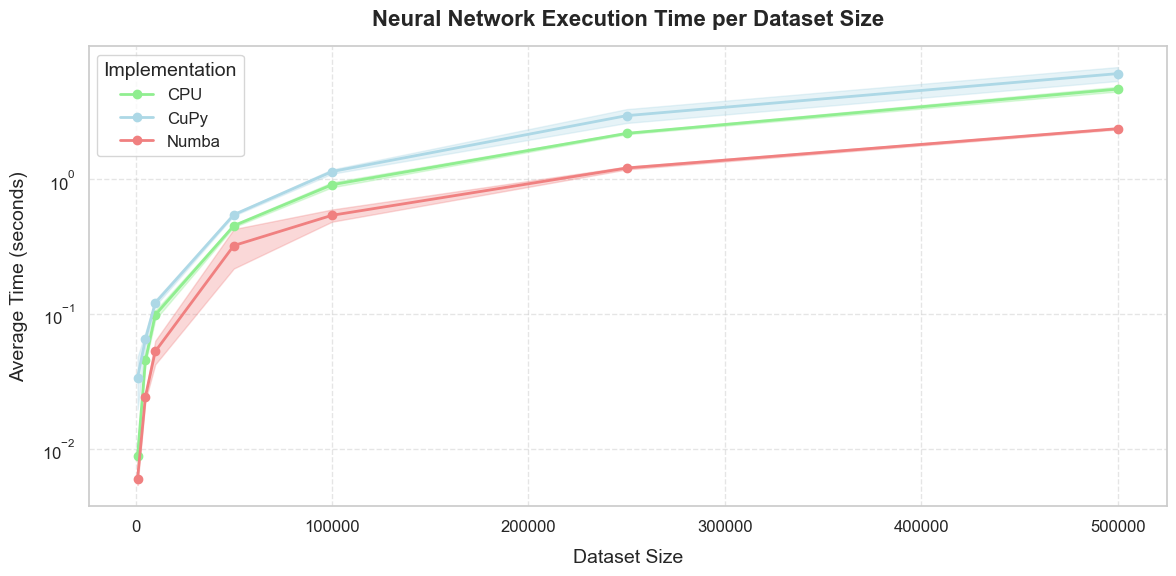

In [44]:
# Create the plot
plt.figure(figsize=(12, 6))
palette = {"CPU": "lightgreen", "CuPy": "lightblue", "Numba": "lightcoral"}

# Loop through each implementation and plot the line with its stddev as a shaded area
for impl in epoch_results['Implementation'].unique():
    df = epoch_results[epoch_results['Implementation'] == impl].sort_values("Dataset Size")
    plt.plot(df["Dataset Size"], df["Average Time (s)"],
             marker="o", color=palette.get(impl, "gray"), label=impl, linewidth=2)
    plt.fill_between(df["Dataset Size"],
                     df["Average Time (s)"] - df["Std Dev (s)"],
                     df["Average Time (s)"] + df["Std Dev (s)"],
                     color=palette.get(impl, "gray"), alpha=0.3)

plt.title("Neural Network Execution Time per Dataset Size", fontsize=16, fontweight="bold")
plt.xlabel("Dataset Size", fontsize=14)
plt.ylabel("Average Time (seconds)", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title="Implementation", fontsize=12, title_fontsize=14)
plt.yscale("log")
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()
